In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

In [3]:
df=pd.read_csv("sonardata.csv")

In [4]:
df.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0.0200  207 non-null    float64
 1   0.0371  207 non-null    float64
 2   0.0428  207 non-null    float64
 3   0.0207  207 non-null    float64
 4   0.0954  207 non-null    float64
 5   0.0986  207 non-null    float64
 6   0.1539  207 non-null    float64
 7   0.1601  207 non-null    float64
 8   0.3109  207 non-null    float64
 9   0.2111  207 non-null    float64
 10  0.1609  207 non-null    float64
 11  0.1582  207 non-null    float64
 12  0.2238  207 non-null    float64
 13  0.0645  207 non-null    float64
 14  0.0660  207 non-null    float64
 15  0.2273  207 non-null    float64
 16  0.3100  207 non-null    float64
 17  0.2999  207 non-null    float64
 18  0.5078  207 non-null    float64
 19  0.4797  207 non-null    float64
 20  0.5783  207 non-null    float64
 21  0.5071  207 non-null    float64
 22  0.

In [10]:
df["R"].unique()

array(['R', 'M'], dtype=object)

<Axes: ylabel='count'>

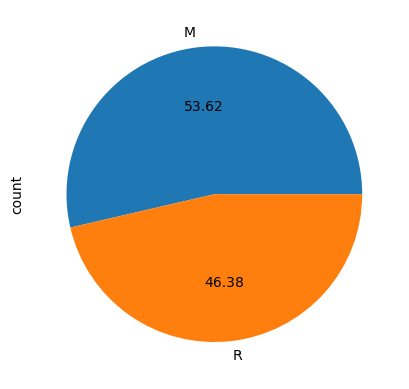

In [13]:
df["R"].value_counts().plot(kind="pie",autopct="%0.2f")

In [14]:
df["R"].value_counts()

R
M    111
R     96
Name: count, dtype: int64

In [16]:
df.shape


(207, 61)

In [42]:
df.loc[0,:]

0.0200    0.0453
0.0371    0.0523
0.0428    0.0843
0.0207    0.0689
0.0954    0.1183
           ...  
0.0180     0.014
0.0084    0.0049
0.0090    0.0052
0.0032    0.0044
R              R
Name: 0, Length: 61, dtype: object

In [40]:
df.loc[96,:]

0.0200    0.0491
0.0371    0.0279
0.0428    0.0592
0.0207     0.127
0.0954    0.1772
           ...  
0.0180    0.0194
0.0084     0.014
0.0090    0.0332
0.0032    0.0439
R              M
Name: 96, Length: 61, dtype: object

In [43]:
df.groupby("R").mean()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
R,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022524,0.030232,0.035879,0.041664,0.061680,0.096199,0.113767,0.117153,0.135584,0.158785,...,0.012198,0.010533,0.009673,0.009451,0.008581,0.007333,0.007708,0.006659,0.007058,0.006053


# Model Prediction -Logistic Regression

In [44]:
x=df.loc[:,df.columns!="R"]

In [45]:
x.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0104,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062


In [47]:
y=df.loc[:,df.columns=="R"]

In [48]:
y.head()

,R
0,R
1,R
2,R
3,R
4,R


In [49]:
from sklearn.model_selection import train_test_split

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [56]:
x_train.shape

(144, 60)

In [57]:
y_train.shape

(144, 1)

In [58]:
x_test.shape

(63, 60)

In [59]:
y_test.shape

(63, 1)

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [61]:
lr=LogisticRegression()

In [62]:
lr.fit(x_train,y_train)

C:\Users\tanta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [63]:
predict=lr.predict(x_train)

In [64]:
training_data_accuracy = accuracy_score(predict, y_train) 

In [65]:
print(training_data_accuracy)

0.8541666666666666


In [67]:
predict_test=lr.predict(x_test)
testing_data_accuracy=accuracy_score(predict_test,y_test)

In [68]:
print(predict_test)

['M' 'R' 'R' 'M' 'R' 'M' 'R' 'M' 'R' 'R' 'R' 'R' 'M' 'R' 'M' 'M' 'M' 'R'
 'M' 'R' 'R' 'M' 'R' 'M' 'M' 'R' 'M' 'M' 'M' 'R' 'M' 'M' 'M' 'R' 'M' 'M'
 'R' 'R' 'M' 'R' 'M' 'M' 'R' 'R' 'M' 'M' 'R' 'M' 'M' 'R' 'M' 'M' 'M' 'R'
 'M' 'R' 'M' 'R' 'M' 'R' 'M' 'M' 'R']


In [69]:
print(y_test)

     R
48   R
42   R
66   R
115  M
84   R
..  ..
181  M
34   R
1    R
137  M
5    R

[63 rows x 1 columns]


In [81]:
p=np.array(predict_test)

In [83]:
y=np.array(y_test)

In [96]:
count=0
for i in range(0,p.size):
    if(p[i]==y[i]):
        count=count+1
print(count)


63


# K nearest Neighbours

In [97]:
from sklearn.neighbors import KNeighborsClassifier

In [99]:
knn= KNeighborsClassifier(5)

In [101]:
knn.fit(x_train,y_train)

C:\Users\tanta\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [103]:
predict_train_knn=knn.predict(x_train)
train_knn_accuracy=accuracy_score(predict_train_knn,y_train)

In [104]:
print(train_knn_accuracy)

0.8472222222222222


In [105]:
predict_test_knn=knn.predict(x_test)
test_knn_accuracy=accuracy_score(predict_test_knn,y_test)

In [106]:
test_knn_accuracy

0.7936507936507936

# Decision Tree

In [107]:
from sklearn.tree import DecisionTreeClassifier

In [108]:
dtc=DecisionTreeClassifier()

In [109]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [110]:
predict_train_dtc=dtc.predict(x_train)
precit_train_dtc_accuracy=accuracy_score(predict_train_dtc,y_train)

In [111]:
precit_train_dtc_accuracy

1.0

In [112]:
predict_test_dtc=dtc.predict(x_test)
precit_test_dtc_accuracy=accuracy_score(predict_test_dtc,y_test)

In [113]:
precit_test_dtc_accuracy

0.7301587301587301

# SVM

In [114]:
from sklearn.svm import SVC

In [115]:
svc=SVC()

In [116]:
svc.fit(x_train,y_train)

C:\Users\tanta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [118]:
predict_train_svc=svc.predict(x_train)
precit_train_svc_accuracy=accuracy_score(predict_train_svc,y_train)

In [119]:
precit_train_svc_accuracy

0.8680555555555556

In [120]:
predict_test_svc=svc.predict(x_test)
precit_test_svc_accuracy=accuracy_score(predict_test_svc,y_test)

In [121]:
precit_test_svc_accuracy

0.7619047619047619

# Random Forest

In [122]:
from sklearn.ensemble import RandomForestClassifier

In [124]:
rf = RandomForestClassifier(n_estimators=1000, criterion = 'entropy', random_state = 0 )

In [125]:
rf.fit(x_train,y_train)

C:\Users\tanta\AppData\Local\Temp\ipykernel_980\1149647727.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=0)

In [127]:
predict_test_rfc=rf.predict(x_test)
precit_test_rfc_accuracy=accuracy_score(predict_test_rfc,y_test)

In [130]:
precit_test_rfc_accuracy

0.8253968253968254

# Analysis of various Models

In [131]:
print ("Logistic Regression : ", round(testing_data_accuracy*100, 2))
print ("Support Vector      : ", round(precit_test_svc_accuracy*100, 2))
print ("Decision Tree       : ", round(precit_test_dtc_accuracy*100, 2))
print ("K-NN Classifier     : ", round(test_knn_accuracy*100, 2))
print ("Random Forest       : ", round(precit_test_rfc_accuracy*100, 2))

Logistic Regression :  74.6
Support Vector      :  76.19
Decision Tree       :  73.02
K-NN Classifier     :  79.37
Random Forest       :  82.54
